## Description: Use the relative Strength Index (RSI) and python to determine id stock is being over bought or over sold

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 
import pandas_datareader as web
plt.style.use('fivethirtyeight')

In [2]:
FB = pd.read_csv('/Users/zhangyujin/Desktop/FB.csv')
FB

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-20,181.880005,184.229996,181.369995,182.720001,182.720001,10352000
1,2019-05-21,184.570007,185.699997,183.889999,184.820007,184.820007,7502800
2,2019-05-22,184.729996,186.740005,183.610001,185.320007,185.320007,9213800
3,2019-05-23,182.419998,183.899994,179.669998,180.869995,180.869995,12768800
4,2019-05-24,182.330002,183.630005,180.830002,181.059998,181.059998,8807700
...,...,...,...,...,...,...,...
249,2020-05-14,202.559998,206.929993,200.690002,206.809998,206.809998,17178900
250,2020-05-15,205.270004,211.339996,204.119995,210.880005,210.880005,19383200
251,2020-05-18,212.149994,214.639999,210.940002,213.190002,213.190002,20151900
252,2020-05-19,213.270004,220.490005,212.830002,216.880005,216.880005,31843200


In [3]:
# Set the data as the index for the data
FB = FB.set_index(pd.DatetimeIndex(FB['Date'].values))
FB

,Date,Open,High,Low,Close,Adj Close,Volume
2019-05-20,2019-05-20,181.880005,184.229996,181.369995,182.720001,182.720001,10352000
2019-05-21,2019-05-21,184.570007,185.699997,183.889999,184.820007,184.820007,7502800
2019-05-22,2019-05-22,184.729996,186.740005,183.610001,185.320007,185.320007,9213800
2019-05-23,2019-05-23,182.419998,183.899994,179.669998,180.869995,180.869995,12768800
2019-05-24,2019-05-24,182.330002,183.630005,180.830002,181.059998,181.059998,8807700
...,...,...,...,...,...,...,...
2020-05-14,2020-05-14,202.559998,206.929993,200.690002,206.809998,206.809998,17178900
2020-05-15,2020-05-15,205.270004,211.339996,204.119995,210.880005,210.880005,19383200
2020-05-18,2020-05-18,212.149994,214.639999,210.940002,213.190002,213.190002,20151900
2020-05-19,2020-05-19,213.270004,220.490005,212.830002,216.880005,216.880005,31843200


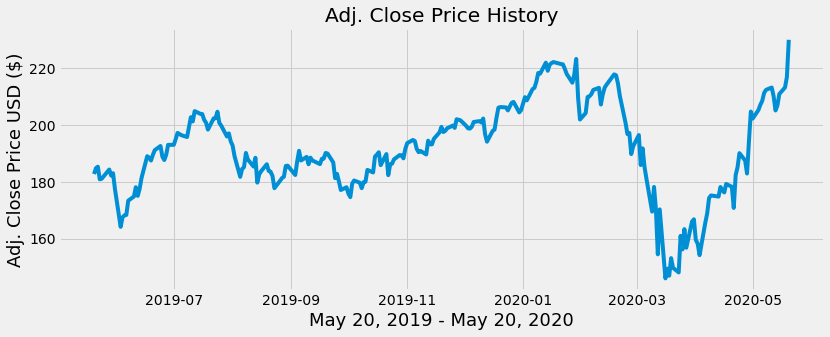

In [4]:
# Visually show the data
plt.figure(figsize = (12.2, 4.5))
plt.plot(FB.index, FB['Adj Close'], label = 'Adj Close Price')
plt.title('Adj. Close Price History')
plt.xlabel('May 20, 2019 - May 20, 2020', fontsize = 18)
plt.ylabel('Adj. Close Price USD ($)', fontsize = 18)
plt.show()

In [6]:
# Prepare the data to calculate RSI
# Get the difference price from the previous day
delta = FB['Adj Close'].diff(1)
delta

2019-05-20          NaN
2019-05-21     2.100006
2019-05-22     0.500000
2019-05-23    -4.450012
2019-05-24     0.190003
                ...    
2020-05-14     1.709992
2020-05-15     4.070007
2020-05-18     2.309997
2020-05-19     3.690003
2020-05-20    13.089996
Name: Adj Close, Length: 254, dtype: float64

In [7]:
delta = delta.dropna()
delta

2019-05-21     2.100006
2019-05-22     0.500000
2019-05-23    -4.450012
2019-05-24     0.190003
2019-05-28     3.250000
                ...    
2020-05-14     1.709992
2020-05-15     4.070007
2020-05-18     2.309997
2020-05-19     3.690003
2020-05-20    13.089996
Name: Adj Close, Length: 253, dtype: float64

In [8]:
# Get the postive gains (up) and the negative gains (down)
up = delta.copy()
down = delta.copy()

up[up < 0] = 0
down[down > 0] = 0

In [9]:
# Get the time period
period = 14

# Cacluate the average gain and the average loss
# abs 是返回絕對值
AVG_Gain = up.rolling(window = period).mean()
AVG_Loss = abs(down.rolling(window = period).mean())

In [10]:
# Calculate the RSI
# Calculate the Relative Strength (RS)
RS = AVG_Gain / AVG_Loss

# Calculate the Relative Strength Index (RSI)
RSI = 100.0 - (100.0 / (1.0 + RS))

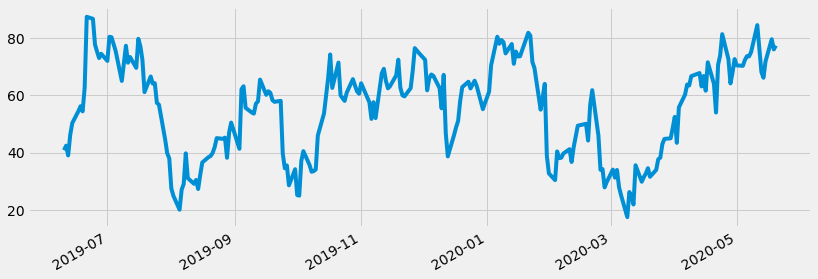

In [13]:
# Show the Visually
plt.figure(figsize = (12.5, 4.5))
RSI.plot()
plt.show()

In [16]:
# Put it together
# Create a new data frame
new_df = pd.DataFrame()
new_df['Adj Close'] = FB['Adj Close']
new_df['RSI'] = RSI
new_df

,Adj Close,RSI
2019-05-20,182.720001,NaN
2019-05-21,184.820007,NaN
2019-05-22,185.320007,NaN
2019-05-23,180.869995,NaN
2019-05-24,181.059998,NaN
...,...,...
2020-05-14,206.809998,66.065258
2020-05-15,210.880005,71.809716
2020-05-18,213.190002,79.501180
2020-05-19,216.880005,75.943302


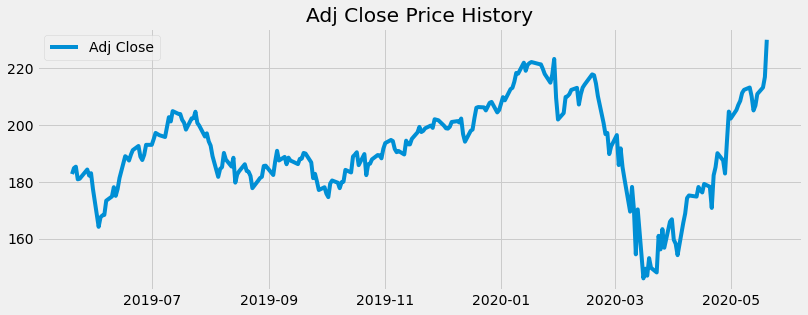

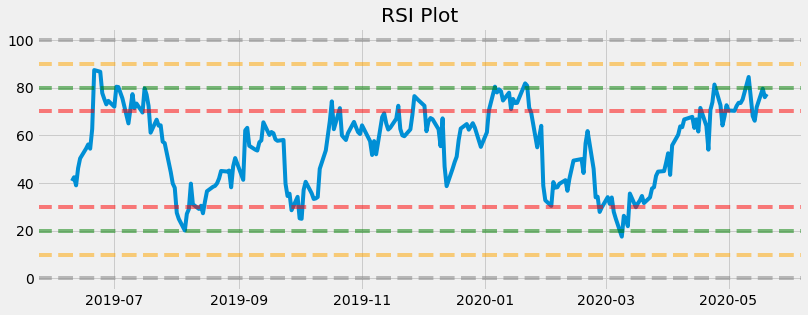

In [19]:
# Visually show the adjusted close price and RSI
# Plot the adjusted close price
plt.figure(figsize = (12.2, 4.5))
plt.plot(new_df.index, new_df['Adj Close'])
plt.title('Adj Close Price History')
plt.legend(new_df.columns.values, loc = 'upper left')
plt.show()

# Plot the corresponding RSI values and the significant levels
plt.figure(figsize = (12.2, 4.5))
plt.title('RSI Plot')
plt.plot(new_df.index, new_df['RSI'])
plt.axhline(0, linestyle = '--', alpha = 0.5, color = 'gray')
plt.axhline(10, linestyle = '--', alpha = 0.5, color = 'orange')
plt.axhline(20, linestyle = '--', alpha = 0.5, color = 'green')
plt.axhline(30, linestyle = '--', alpha = 0.5, color = 'red')
plt.axhline(70, linestyle = '--', alpha = 0.5, color = 'red')
plt.axhline(80, linestyle = '--', alpha = 0.5, color = 'green')
plt.axhline(90, linestyle = '--', alpha = 0.5, color = 'orange')
plt.axhline(100, linestyle = '--', alpha = 0.5, color = 'gray')
plt.show()